In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv("D:/Datasets/new/Mobile price New - Mobile price New.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,"2,549.00",9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,"2,631.00",17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,"2,603.00",11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,"2,769.00",16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,"1,411.00",8,2,15,1,1,0,1.0


### Understanding the dataset

In [4]:
# shape of the dataset

df.shape

(2001, 21)

In [5]:
# data types of each column

df.dtypes

battery_power     object
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt         object
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

### Data Cleaning 

In [6]:
# checking any missing values in the dataset

df.isnull().sum()

battery_power    2
blue             1
clock_speed      3
dual_sim         1
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        1
n_cores          0
pc               1
px_height        1
px_width         2
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      2
dtype: int64

##### Dealing with Missing value 

In [7]:
# as the percentage of null values is less ---> dropping the rows

df.dropna(inplace=True)

##### Dealing with noise value

In [8]:
# unique values in the "mobile_wt" column

df['mobile_wt'].unique()

array(['188', '136', '145', '131', '141', '139', '187', '174', '182',
       '177', '159', '185', '121', '101', '81', '156', '199', '114',
       '111', '132', '143', '96', '200', '88', '150', '107', '100', '157',
       '160', '119', '152', '166', '110', '118', '164', '196', '162',
       '198', '127', '109', '102', '104', '148', '180', '128', '134',
       '144', '168', '155', '165', '80', '138', '142', '90', '197', '172',
       '116', '85', '163', '178', '171', '103', '83', '140', '194', '146',
       '192', '106', '135', '153', '89', '82', '130', '189', '181', '99',
       '184', '195', '108', '133', '179', '147', '137', '190', '176',
       '84', '97', '124', '183', '93', '113', '92', '95', '151', '117',
       '94', '173', '105', '115', '91', '112', '123', '129', '154', '191',
       '175', '86', '98', '125', '126', '158', '170', '87', '161', '193',
       '169', '120', '149', '186', 'Realme', '122', '167'], dtype=object)

In [9]:
df = df[df['mobile_wt']!='Realme']

In [10]:
df['battery_power'] = pd.to_numeric(df['battery_power'],errors ='coerce')
df['mobile_wt'] = pd.to_numeric(df['mobile_wt'],errors ='coerce')
df['px_width'] = pd.to_numeric(df['px_width'], errors='coerce')

In [11]:
df['ram'] = df['ram'].apply(lambda x: x.replace(',', '') if ',' in x else x)

In [12]:
df['ram'] = pd.to_numeric(df['ram'], errors='coerce')

### EDA

In [13]:
# average battery power of the mobile phones in the dataset

df['battery_power'].mean()

1238.8930912758447

### Distribution of battery power

Text(0.5, 1.0, 'Distribution of battery power')

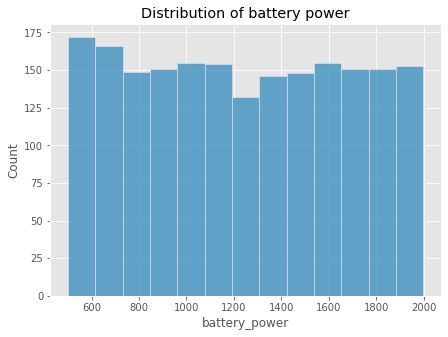

In [17]:
# distribution of battery power in the dataset

pal = sns.color_palette("pastel")
plt.figure(figsize=(7,5))
sns.histplot(data = df['battery_power'], palette=pal)
plt.title('Distribution of battery power')

In [18]:
# no of mobile phones have a dual sim support

df['dual_sim'].value_counts()[1.0]

1012

In [19]:
# maximum internal memory in the dataset

df['int_memory'].max()

64.0

In [20]:
# minimum internal memory in the dataset

df['int_memory'].min()

2.0

### Distribution of internal memory

Text(0.5, 1.0, 'Distribution of internal memory')

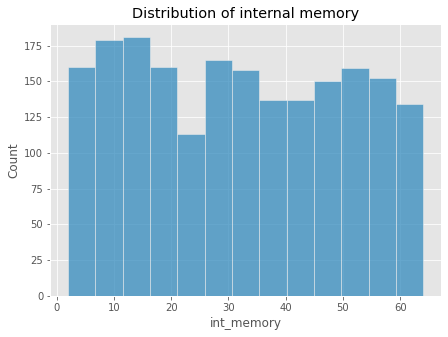

In [22]:
# distribution of internal memory in the dataset

plt.figure(figsize=(7,5))
sns.histplot(data = df['int_memory'], palette=pal)
plt.title('Distribution of internal memory')

In [23]:
# no of mobile phones have 4G support

df['four_g'].value_counts()[1]

1037

In [24]:
# average weight of mobile phones in the dataset

df['mobile_wt'].mean()

140.21007556675062

In [25]:
#  maximum RAM size in the dataset

df['ram'].max()

3998.0

In [26]:
# minimum RAM size in the dataset

df['ram'].min()

256.0

In [27]:
# no of mobile phones have a touch screen and 4G support

len(df[(df['touch_screen']==1) & (df['four_g']==1)])

530

In [30]:
# average internal memory capacity of mobile phones with 4G support and a primary camera quality of 8 megapixels or higher

df[(df['four_g']==1) & (df['fc']>=8)]['int_memory'].mean()

31.14090909090909

In [31]:
# mobile phone has the highest RAM size and what are its other specifications

df[df['ram']==df['ram'].max()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
941,1456.0,0.0,1.6,1.0,9,1,39.0,0.1,80,8,...,815.0,1666.0,3998.0,6,3,13,1,1,0,3.0


### Distribution of Battery Power

Text(0.5, 1.0, 'Distribution of Battery Power')

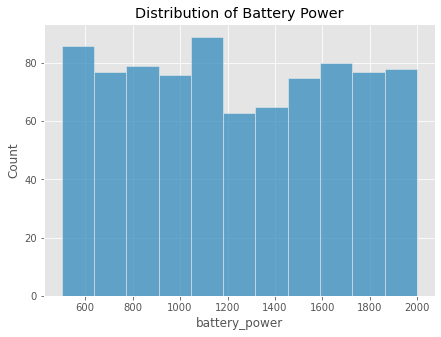

In [36]:
# distribution of battery power for mobile phones with a weight between 150 and 200 grams

plt.figure(figsize=(7,5))
x = df[(df['mobile_wt'] >=150) & (df['mobile_wt'] <= 200)]['battery_power']
sns.histplot(data=x, palette=pal)
plt.title('Distribution of Battery Power')

In [26]:
# No of mobile phones have a primary camera quality of 8 megapixels or higher and a touch screen

len(df[(df['sc_w']>=8) & (df['touch_screen']==1)])

337

In [27]:
# average weight of mobile phones with 4G support and a touch screen

df[(df['four_g']==1) & (df['touch_screen']==1)]['mobile_wt'].mean()

138.77169811320755

In [28]:
# no of  mobile phones have a battery power greater than 3000 mAh and a talk time greater than 20 hours

len(df[(df['battery_power']>3000) & (df['talk_time']>20)])

0

In [29]:
# mobile phone has the highest primary camera quality and what are its other specifications

df[(df['sc_w']==df['sc_w'].max())]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
370,1725.0,0.0,0.5,1.0,8,1,52.0,1.0,185,6,...,1125.0,1195.0,1243.0,19,18,5,1,1,1,1.0
394,1375.0,1.0,1.1,0.0,3,1,9.0,0.9,145,7,...,475.0,726.0,3869.0,19,18,10,1,1,1,3.0
1061,1408.0,1.0,2.5,0.0,3,0,32.0,0.1,151,4,...,875.0,982.0,3162.0,19,18,3,1,0,0,3.0
1255,1083.0,0.0,1.0,0.0,6,0,52.0,0.9,126,2,...,925.0,1469.0,681.0,19,18,19,1,1,1,0.0
1421,904.0,0.0,2.7,1.0,4,0,19.0,0.6,147,6,...,1094.0,1496.0,545.0,19,18,16,0,0,0,0.0
1646,1940.0,1.0,1.0,1.0,0,1,5.0,0.2,194,4,...,588.0,1809.0,820.0,19,18,3,1,1,1,1.0
1808,713.0,0.0,1.4,1.0,4,0,53.0,0.8,98,1,...,123.0,1477.0,1462.0,19,18,13,1,0,1,0.0
1973,1191.0,0.0,0.8,0.0,6,1,46.0,0.8,89,6,...,42.0,807.0,824.0,19,18,7,1,0,0,0.0


In [33]:
# No of mobile phones have a battery power greater than the average battery power of all mobile phones in the dataset

len(df[(df['battery_power']>df['battery_power'].mean())])

979

In [34]:
# correlation between battery power and screen size
df.corr()['battery_power']['sc_h']

-0.032839563887045856

In [35]:
df.corr()['battery_power']['sc_w']

-0.015110507553040848

### Number of Processor cores VS Battery Power

Text(0.5, 1.0, 'Number of Processor cores VS Battery Power')

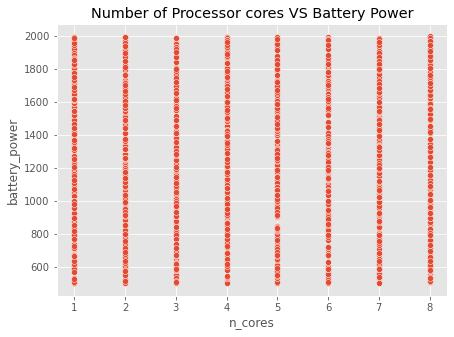

In [41]:
# the number of processor cores affect the battery life of mobile phones

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='n_cores', y='battery_power')
plt.title('Number of Processor cores VS Battery Power')

### Mobile Weight VS FC

Text(0.5, 1.0, 'Mobile Weight VS FC')

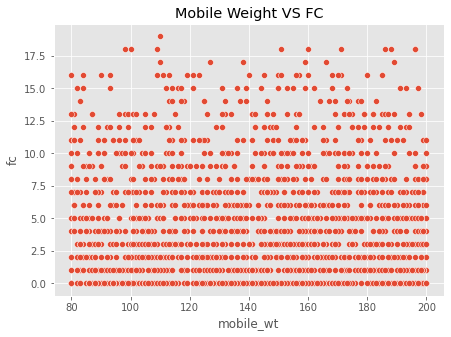

In [42]:
# Is there a relationship between the weight of a mobile phone and the quality of its primary camera

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='mobile_wt', y='fc')
plt.title('Mobile Weight VS FC')

### Battery Power VS Price Range

Text(0.5, 1.0, 'Mobile Weight VS FC')

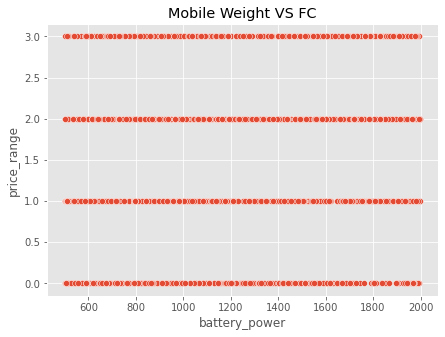

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='battery_power', y='price_range')
plt.title('Battery Power VS Price Range')